# Name: Shrook Ehab Attia
# Group No.: 1
# AI - Nasr City Intake 2

## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x_points = np.linspace(0,20)
print(x_points)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [3]:
a = -2
b = 1
y_points = np.add(np.multiply(a, x_points), b)
print(y_points)

[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.67346939
 -23.48979592 -24.30612245 -25.12244898 -25.93877551 -26.75510204
 -27.57142857 -28.3877551  -29.20408163 -30.02040816 -30.83673469
 -31.65306122 -32.46938776 -33.28571429 -34.10204082 -34.91836735
 -35.73469388 -36.55102041 -37.36734694 -38.18367347 -39.        ]


#### Plot your data points. 

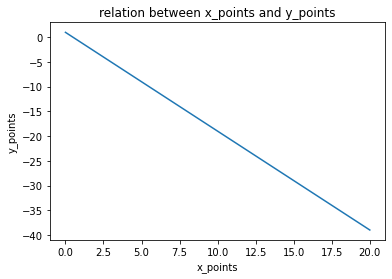

In [4]:
plt.plot(x_points, y_points)
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

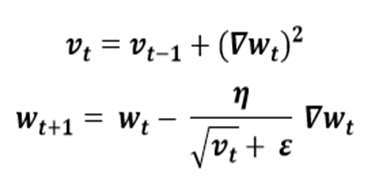

In [47]:
def AdagradBatch(x_points, y_points, epsilon, learning_rate, maxNumOfIteration):
    m = len(x_points)
    theta = [0,0]
    vt = [0,0]
    loss = []
    thetas0 = []
    thetas1 = []
    vts0 = []
    vts1 = []
    GDtheta = [0,0]
    hyposesis = []
    iteration = 1
    numIter = []
    for i in range(maxNumOfIteration):
        print('==================iteration{}==================='.format(iteration))
        hThetaX = np.add(theta[0], np.multiply(theta[1], x_points))
        hyposesis.append(hThetaX)
        numIter.append(i)
        #JTheta = (1 / 2 * m) * np.sum(np.power(np.subtract(hThetaX, y_points), 2))
        JTheta = (1 / (2 * m)) * np.sum(np.subtract(hThetaX, y_points) **2)
        loss.append(JTheta)
        GDtheta[0] = (1 / m) * np.sum(np.multiply(np.subtract(hThetaX, y_points), 1))
        GDtheta[1] = (1 / m) * np.sum(np.multiply(np.subtract(hThetaX, y_points), x_points))
        thetas0.append(theta[0])
        thetas1.append(theta[1])
        vt[0] = vt[0] + GDtheta[0] ** 2
        vt[1] = vt[1] + GDtheta[1] ** 2
        vts0.append(vt[0])
        vts1.append(vt[1])
        theta[0] = theta[0] - (learning_rate / (np.sqrt(vt[0]) + epsilon)) * GDtheta[0]
        theta[1] = theta[1] - (learning_rate / (np.sqrt(vt[1]) + epsilon)) * GDtheta[1]
        print('error using MSE = ', JTheta)
        print('New Theta = ', theta)
        print('')
        iteration = iteration + 1
        #norm = L2Norm(gradTheta)
        #norm = np.absolute(np.dot(GDTheta0, GDTheta1))
        #norm = np.linalg.norm(GDtheta)
        norm1 = np.linalg.norm(vt)
        optimum = hThetaX
        if i > 0:
            if norm1 < 0.01:
                break
            if np.absolute(loss[i] - loss[i-1]) < 0.0001:
                break
#print('loss is: ', loss)
#print('thetas is: ', theta)
    return [thetas0, thetas1, vts0, vts1, loss, hyposesis, optimum, numIter]

In [48]:
epsilon = 10e-8
learning_rate = 0.1
maxNumOfIteration = 1000
thetas0, thetas1, vts0, vts1, loss, hyposesis, optimum, numIter = AdagradBatch(x_points, y_points, epsilon, learning_rate, maxNumOfIteration)

==================iteration1===================
error using MSE =  249.88775510204087
New Theta =  [-0.09999999947368421, -0.09999999996144768]

==================iteration2===================
error using MSE =  222.8274489984551
New Theta =  [-0.16857230917928928, -0.16865361777555787]

==================iteration3===================
error using MSE =  205.15232874092868
New Theta =  [-0.22346984736871167, -0.22366178066913145]

==================iteration4===================
error using MSE =  191.52048998195872
New Theta =  [-0.27027189433469, -0.2705912170996825]

==================iteration5===================
error using MSE =  180.26351258706467
New Theta =  [-0.31156697829352775, -0.3120254283397367]

==================iteration6===================
error using MSE =  170.61000137694745
New Theta =  [-0.34880272171385185, -0.3494094798524413]

==================iteration7===================
error using MSE =  162.12972892203723
New Theta =  [-0.3828847623232197, -0.3836475095889

error using MSE =  0.9844328035832564
New Theta =  [-1.5977649872437556, -1.7661826645883951]

==================iteration326===================
error using MSE =  0.9820605281609848
New Theta =  [-1.597487247972142, -1.7665939753443325]

==================iteration327===================
error using MSE =  0.9797298822052858
New Theta =  [-1.5972054063271466, -1.7670013588208304]

==================iteration328===================
error using MSE =  0.9774399704720748
New Theta =  [-1.5969195087813661, -1.76740485764843]

==================iteration329===================
error using MSE =  0.9751899171002506
New Theta =  [-1.5966296013024968, -1.7678045139907212]

==================iteration330===================
error using MSE =  0.972978865190992
New Theta =  [-1.5963357293588394, -1.7682003695495387]

==================iteration331===================
error using MSE =  0.9708059763962303
New Theta =  [-1.5960379379247442, -1.7685924655700966]

==================iteration332=========

New Theta =  [-1.428141799353805, -1.8139283451614963]

==================iteration644===================
error using MSE =  0.7615828837223293
New Theta =  [-1.4275375284515688, -1.813986574053257]

==================iteration645===================
error using MSE =  0.7611945702877148
New Theta =  [-1.4269332919894033, -1.814044668756231]

==================iteration646===================
error using MSE =  0.7608064988691304
New Theta =  [-1.4263290913572404, -1.8141026305919028]

==================iteration647===================
error using MSE =  0.7604186685097252
New Theta =  [-1.4257249279293331, -1.814160460867453]

==================iteration648===================
error using MSE =  0.7600310782709215
New Theta =  [-1.4251208030644276, -1.8142181608759151]

==================iteration649===================
error using MSE =  0.759643727232021
New Theta =  [-1.4245167181059304, -1.8142757318963278]

==================iteration650===================
error using MSE =  0.7592566

error using MSE =  0.6453054249854148
New Theta =  [-1.235691844880906, -1.8296968468909316]

==================iteration972===================
error using MSE =  0.6449796144345116
New Theta =  [-1.2351277900724795, -1.8297402115325414]

==================iteration973===================
error using MSE =  0.6446539732069766
New Theta =  [-1.2345638823247127, -1.8297835612348203]

==================iteration974===================
error using MSE =  0.6443285012091947
New Theta =  [-1.234000121630867, -1.8298268960381396]

==================iteration975===================
error using MSE =  0.6440031983476203
New Theta =  [-1.2334365079837888, -1.82987021598247]

==================iteration976===================
error using MSE =  0.6436780645287763
New Theta =  [-1.2328730413759141, -1.8299135211073863]

==================iteration977===================
error using MSE =  0.6433530996592589
New Theta =  [-1.2323097217992731, -1.8299568114520717]

==================iteration978=========

In [46]:
from sklearn.metrics import r2_score
r2_score(y_points, optimum)

0.9908351938619323

In [38]:
print('thetas0: ', thetas0)
print('')
print('thetas1: ', thetas1)
print('')
print('vts0: ', vts0)
print('')
print('vts1: ', vts1)
print('')
print('loss: ', loss)
print('')
print('hyposesis: ', hyposesis)
print('')
print('optimum: ', optimum)

thetas0:  [0, -0.09999999947368421, -0.16857230917928928, -0.22346984736871167, -0.27027189433469, -0.31156697829352775, -0.34880272171385185, -0.3828847623232197, -0.41442399868228574, -0.44385549507981503, -0.4715020689481522, -0.4976110741328871, -0.5223770093112952, -0.5459561022968573, -0.5684760970448393, -0.5900430409301366, -0.6107461245368614, -0.6306612160977694, -0.6498534966248325, -0.6683794604813788, -0.6862884587055963, -0.7036239066679523, -0.7204242411962823, -0.7367236879063889, -0.752552882806416, -0.7679393806390311, -0.7829080742099644, -0.7974815430451578, -0.8116803454125937, -0.8255232645646163, -0.8390275176797966, -0.852208934187547, -0.8650821087879129, -0.8776605334227106, -0.8899567116330813, -0.9019822580949635, -0.9137479856156537, -0.9252639814702157, -0.936539674632547, -0.9475838951947653, -0.9584049270567694, -0.9690105547950572, -0.9794081054781937, -0.9896044860795179, -0.9996062170409221, -1.0094194624610173, -1.0190500573136922, -1.028503532046577

hyposesis:  [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([-0.1       , -0.14081633, -0.18163265, -0.22244898, -0.26326531,
       -0.30408163, -0.34489796, -0.38571429, -0.42653061, -0.46734694,
       -0.50816326, -0.54897959, -0.58979592, -0.63061224, -0.67142857,
       -0.7122449 , -0.75306122, -0.79387755, -0.83469388, -0.8755102 ,
       -0.91632653, -0.95714286, -0.99795918, -1.03877551, -1.07959184,
       -1.12040816, -1.16122449, -1.20204082, -1.24285714, -1.28367347,
       -1.32448979, -1.36530612, -1.40612245, -1.44693877, -1.4877551 ,
       -1.52857143, -1.56938775, -1.61020408, -1.65102041, -1.69183673,
       -1.73265306, -1.77346939, -1.81428571, -1.85510204, -1.89591837,
       -1.93673469, -1.97755102, -2.01836735, -2.05918367, -2.1       ]), array([-0.16857231, -0.23741052, -0.306248

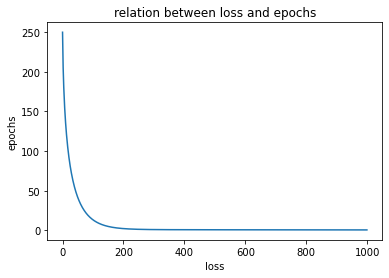

In [39]:
plt.plot(loss)
plt.title('relation between loss and epochs')
plt.ylabel('epochs')
plt.xlabel('loss')
plt.show()

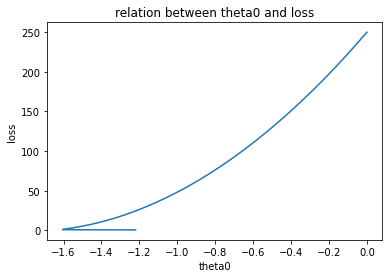

In [40]:
plt.plot(thetas0, loss)
plt.title('relation between theta0 and loss')
plt.ylabel('loss')
plt.xlabel('theta0')
plt.show()

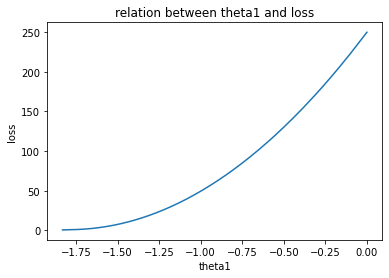

In [41]:
plt.plot(thetas1, loss)
plt.title('relation between theta1 and loss')
plt.ylabel('loss')
plt.xlabel('theta1')
plt.show()

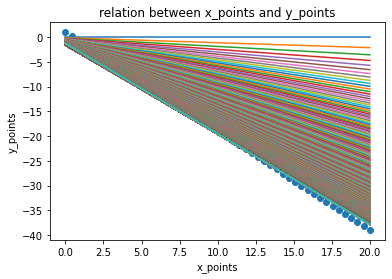

In [42]:
plt.scatter(x_points, y_points)
for i in hyposesis:
    z = np.polyfit(x_points, i, 1)
    p = np.poly1d(z)
    plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

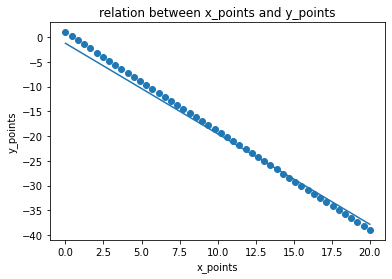

In [43]:
plt.scatter(x_points, y_points)
z = np.polyfit(x_points, optimum, 1)
p = np.poly1d(z)
plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

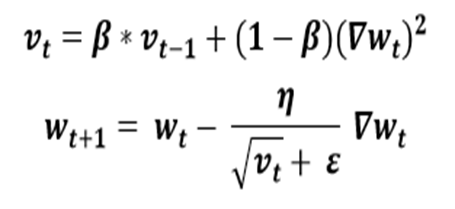

In [49]:
def RMSPropBatch(x_points, y_points, beta, epsilon, learning_rate, maxNumOfIteration):
    m = len(x_points)
    theta = [0,0]
    vt = [0,0]
    loss = []
    thetas0 = []
    thetas1 = []
    vts0 = []
    vts1 = []
    GDtheta = [0,0]
    hyposesis = []
    iteration = 1
    numIter = []
    for i in range(maxNumOfIteration):
        print('==================iteration{}==================='.format(iteration))
        hThetaX = np.add(theta[0], np.multiply(theta[1], x_points))
        hyposesis.append(hThetaX)
        numIter.append(i)
        #JTheta = (1 / 2 * m) * np.sum(np.power(np.subtract(hThetaX, y_points), 2))
        JTheta = (1 / (2 * m)) * np.sum(np.subtract(hThetaX, y_points) **2)
        loss.append(JTheta)
        GDtheta[0] = (1 / m) * np.sum(np.multiply(np.subtract(hThetaX, y_points), 1))
        GDtheta[1] = (1 / m) * np.sum(np.multiply(np.subtract(hThetaX, y_points), x_points))
        thetas0.append(theta[0])
        thetas1.append(theta[1])
        vt[0] = beta * vt[0] + (1 - beta) * (GDtheta[0] ** 2)
        vt[1] = beta * vt[1] + (1 - beta) * (GDtheta[1] ** 2)
        vts0.append(vt[0])
        vts1.append(vt[1])
        theta[0] = theta[0] - (learning_rate / (np.sqrt(vt[0]) + epsilon)) * GDtheta[0]
        theta[1] = theta[1] - (learning_rate / (np.sqrt(vt[1]) + epsilon)) * GDtheta[1]
        print('error using MSE = ', JTheta)
        print('New Theta = ', theta)
        print('')
        iteration = iteration + 1
        #norm = L2Norm(gradTheta)
        #norm = np.absolute(np.dot(GDTheta0, GDTheta1))
        #norm = np.linalg.norm(GDtheta)
        norm1 = np.linalg.norm(vt)
        optimum = hThetaX
        if i > 0:
            if norm1 < 0.01:
                break
            if np.absolute(loss[i] - loss[i-1]) < 0.0001:
                break
#print('loss is: ', loss)
#print('thetas is: ', theta)
    return [thetas0, thetas1, vts0, vts1, loss, hyposesis, optimum, numIter]

In [54]:
epsilon = 10e-8
learning_rate = 0.1
beta = 0.8
maxNumOfIteration = 1000
thetas0, thetas1, vts0, vts1, loss, hyposesis, optimum, numIter = RMSPropBatch(x_points, y_points, beta, epsilon, learning_rate, maxNumOfIteration)

==================iteration1===================
error using MSE =  249.88775510204087
New Theta =  [-0.2236067951184001, -0.2236067975572174]

==================iteration2===================
error using MSE =  191.53070767693407
New Theta =  [-0.3795667850140728, -0.37999952802839876]

==================iteration3===================
error using MSE =  155.34802293735942
New Theta =  [-0.5076387630427843, -0.508724633350443]

==================iteration4===================
error using MSE =  128.42644842614936
New Theta =  [-0.6197114682647162, -0.621633372362975]

==================iteration5===================
error using MSE =  106.93825290224433
New Theta =  [-0.7210614096352056, -0.7240002237684432]

==================iteration6===================
error using MSE =  89.172917380928
New Theta =  [-0.8144880741845717, -0.8186369625016966]

==================iteration7===================
error using MSE =  74.20113424136237
New Theta =  [-0.9016239293223245, -0.9071974698823075]

====

In [55]:
from sklearn.metrics import r2_score
r2_score(y_points, optimum)

0.9972084224383807

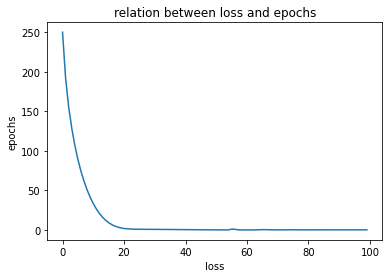

In [56]:
plt.plot(loss)
plt.title('relation between loss and epochs')
plt.ylabel('epochs')
plt.xlabel('loss')
plt.show()

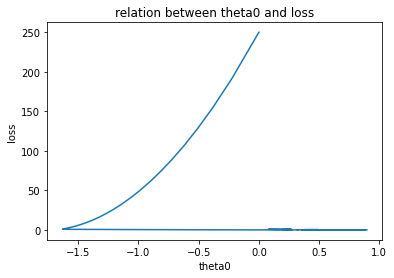

In [57]:
plt.plot(thetas0, loss)
plt.title('relation between theta0 and loss')
plt.ylabel('loss')
plt.xlabel('theta0')
plt.show()

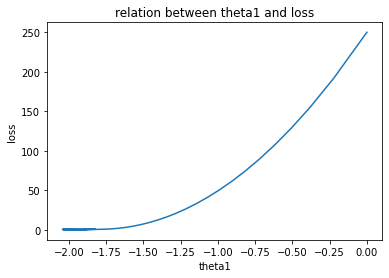

In [58]:
plt.plot(thetas1, loss)
plt.title('relation between theta1 and loss')
plt.ylabel('loss')
plt.xlabel('theta1')
plt.show()

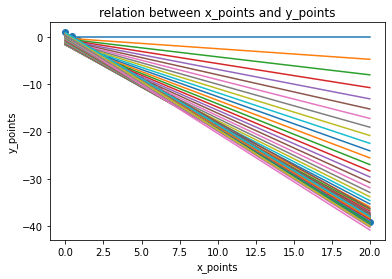

In [59]:
plt.scatter(x_points, y_points)
for i in hyposesis:
    z = np.polyfit(x_points, i, 1)
    p = np.poly1d(z)
    plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

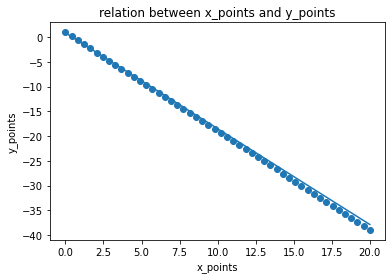

In [60]:
plt.scatter(x_points, y_points)
z = np.polyfit(x_points, optimum, 1)
p = np.poly1d(z)
plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

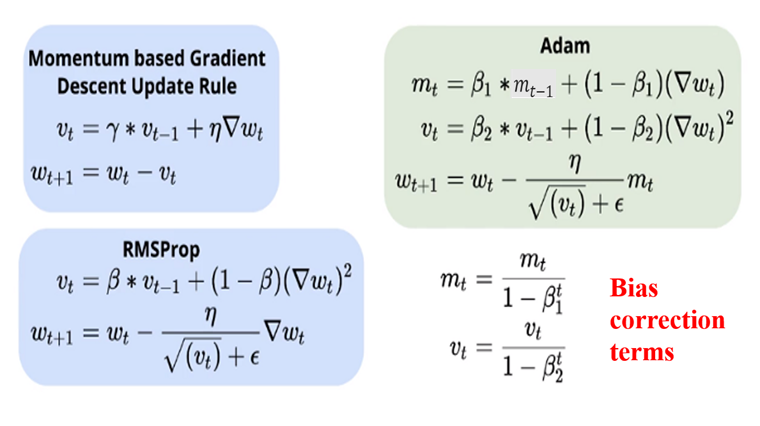

In [71]:
def AdamBatch(x_points, y_points, beta1, beta2, epsilon, learning_rate, maxNumOfIteration):
    m = len(x_points)
    theta = [0,0]
    vt = [0,0]
    mt = [0,0]
    vtHat = [0,0]
    mtHat = [0,0]
    loss = []
    thetas0 = []
    thetas1 = []
    vts0 = []
    vts1 = []
    GDtheta = [0,0]
    hyposesis = []
    iteration = 1
    numIter = []
    for i in range(maxNumOfIteration):
        print('==================iteration{}==================='.format(iteration))
        hThetaX = np.add(theta[0], np.multiply(theta[1], x_points))
        hyposesis.append(hThetaX)
        numIter.append(i)
        #JTheta = (1 / 2 * m) * np.sum(np.power(np.subtract(hThetaX, y_points), 2))
        JTheta = (1 / (2 * m)) * np.sum(np.subtract(hThetaX, y_points) **2)
        loss.append(JTheta)
        GDtheta[0] = (1 / m) * np.sum(np.multiply(np.subtract(hThetaX, y_points), 1))
        GDtheta[1] = (1 / m) * np.sum(np.multiply(np.subtract(hThetaX, y_points), x_points))
        thetas0.append(theta[0])
        thetas1.append(theta[1])
        vt[0] = beta2 * vt[0] + (1 - beta2) * (GDtheta[0] ** 2)
        vt[1] = beta2 * vt[1] + (1 - beta2) * (GDtheta[1] ** 2)
        mt[0] = beta1 * mt[0] + (1 - beta1) * GDtheta[0]
        mt[1] = beta1 * mt[1] + (1 - beta1) * GDtheta[1]
        vts0.append(vt[0])
        vts1.append(vt[1])
        mtHat[0] = mt[0] / (1 - (beta1 ** (i + 1)))
        mtHat[1] = mt[1] / (1 - (beta1 ** (i + 1)))
        vtHat[0] = vt[0] / (1 - (beta2 ** (i + 1)))
        vtHat[1] = vt[1] / (1 - (beta2 ** (i + 1)))
        theta[0] = theta[0] - (learning_rate / (np.sqrt(vtHat[0]) + epsilon)) * mtHat[0]
        theta[1] = theta[1] - (learning_rate  / (np.sqrt(vtHat[1]) + epsilon)) * mtHat[1]
        print('error using MSE = ', JTheta)
        print('New Theta = ', theta)
        print('')
        iteration = iteration + 1
        #norm = L2Norm(gradTheta)
        #norm = np.absolute(np.dot(GDTheta0, GDTheta1))
        #norm = np.linalg.norm(GDtheta)
        norm1 = np.linalg.norm(vt)
        optimum = hThetaX
        if i > 0:
            if norm1 < 0.01:
                break
            if np.absolute(loss[i] - loss[i-1]) < 0.0001:
                break
#print('loss is: ', loss)
#print('thetas is: ', theta)
    return [thetas0, thetas1, vts0, vts1, loss, hyposesis, optimum, numIter]

In [74]:
epsilon = 10e-8
learning_rate = 0.1
beta1 = 0.8
beta2 = 0.8
maxNumOfIteration = 1000
thetas0, thetas1, vts0, vts1, loss, hyposesis, optimum, numIter = AdamBatch(x_points, y_points, beta1, beta2, epsilon, learning_rate, maxNumOfIteration)

==================iteration1===================
error using MSE =  249.88775510204087
New Theta =  [-0.09999999947368421, -0.09999999996144768]

==================iteration2===================
error using MSE =  222.8274489984551
New Theta =  [-0.19995585187847215, -0.19995911211351783]

==================iteration3===================
error using MSE =  197.33424602442992
New Theta =  [-0.2998310837889375, -0.299843863466804]

==================iteration4===================
error using MSE =  173.41402927028017
New Theta =  [-0.39958276358013256, -0.39961517542463415]

==================iteration5===================
error using MSE =  151.07181266183028
New Theta =  [-0.49916012660151493, -0.49922726252477223]

==================iteration6===================
error using MSE =  130.31153104108037
New Theta =  [-0.5985026628451189, -0.5986261059744963]

==================iteration7===================
error using MSE =  111.13581065129995
New Theta =  [-0.6975374460354424, -0.697747333366

In [75]:
from sklearn.metrics import r2_score
r2_score(y_points, optimum)

0.9999647218718803

In [76]:
print('thetas0: ', thetas0)
print('')
print('thetas1: ', thetas1)
print('')
print('vts0: ', vts0)
print('')
print('vts1: ', vts1)
print('')
print('loss: ', loss)
print('')
print('hyposesis: ', hyposesis)
print('')
print('optimum: ', optimum)

thetas0:  [0, -0.09999999947368421, -0.19995585187847215, -0.2998310837889375, -0.39958276358013256, -0.49916012660151493, -0.5985026628451189, -0.6975374460354424, -0.7961753882189049, -0.8943059610943945, -0.9917897086936838, -1.0884475470747803, -1.1840453509642732, -1.2782715972926528, -1.3707048181550774, -1.4607663764083743, -1.5476531180470883, -1.6302455488606378, -1.706995154403328, -1.775819509258604, -1.8340883193819364, -1.8788537067721183, -1.9074584784048614, -1.9183801659190698, -1.9117805387967248, -1.8893358437712793, -1.8535639840587832, -1.807184611450346, -1.7527904815149358, -1.6928041980314608, -1.6296075648597252, -1.5657499710815757, -1.5041275300626198, -1.4479212001369524, -1.4000185839446333, -1.3619833743997303, -1.3332285831361825, -1.3108740886714412, -1.290049653391641, -1.2645826332602348, -1.2289015368846052, -1.1807900398195956, -1.1216251318834147, -1.0541373896179322, -0.9811826218499718, -0.905922361043144, -0.8320620031497133, -0.7625991382425487, 

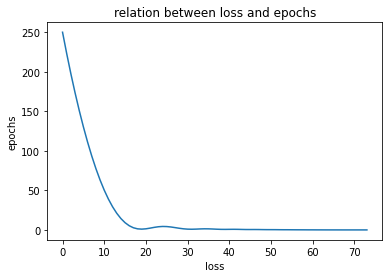

In [77]:
plt.plot(loss)
plt.title('relation between loss and epochs')
plt.ylabel('epochs')
plt.xlabel('loss')
plt.show()

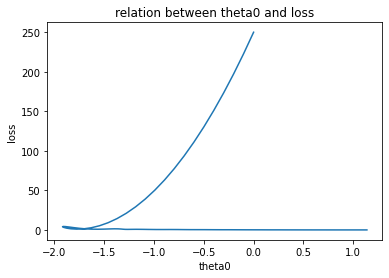

In [78]:
plt.plot(thetas0, loss)
plt.title('relation between theta0 and loss')
plt.ylabel('loss')
plt.xlabel('theta0')
plt.show()

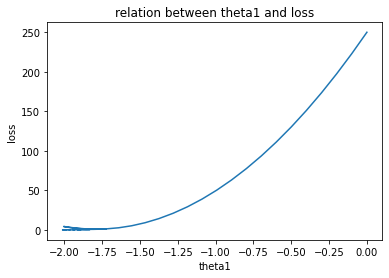

In [79]:
plt.plot(thetas1, loss)
plt.title('relation between theta1 and loss')
plt.ylabel('loss')
plt.xlabel('theta1')
plt.show()

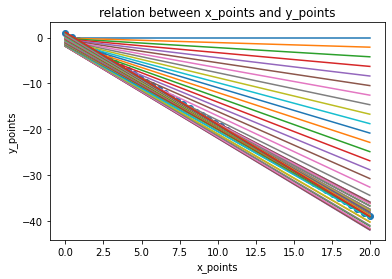

In [80]:
plt.scatter(x_points, y_points)
for i in hyposesis:
    z = np.polyfit(x_points, i, 1)
    p = np.poly1d(z)
    plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

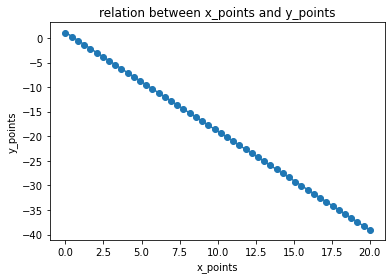

In [81]:
plt.scatter(x_points, y_points)
z = np.polyfit(x_points, optimum, 1)
p = np.poly1d(z)
plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

## Congratulations 
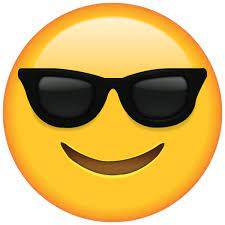